In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Student_performance_data _.csv')
print(df.shape)
y = df['GPA'].to_frame()
x = df.iloc[:,:11]
#x = sm.add_constant(x)
x.describe()

(2392, 12)


,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191
std,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057
min,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

categorical_columns = df.columns.difference(numerical_columns).difference(['GPA']).to_list()
print(categorical_columns)
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female'],
}


['Ethnicity', 'Extracurricular', 'Gender', 'Music', 'ParentalEducation', 'ParentalSupport', 'Sports', 'Tutoring', 'Volunteering']


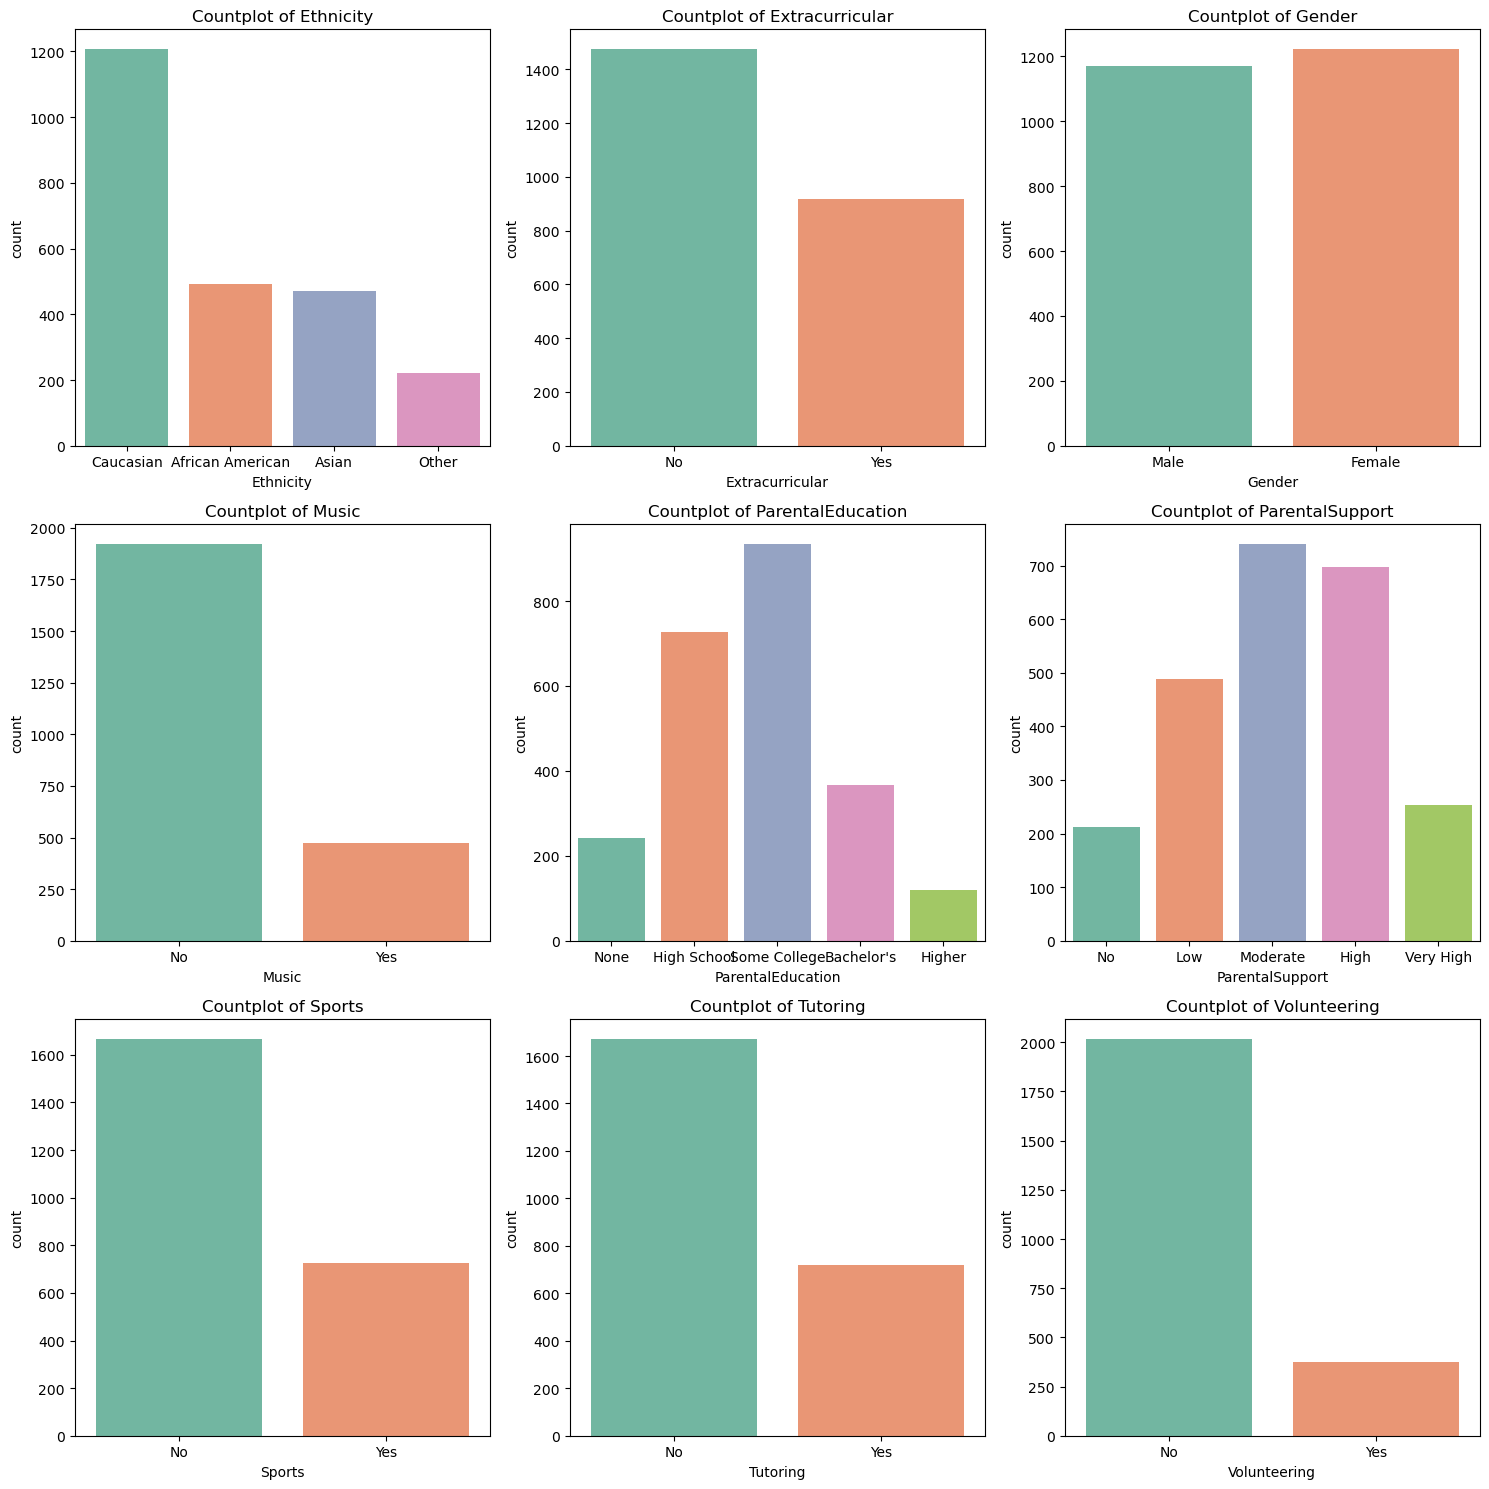

In [17]:
rows, cols = 3, 3

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  

for i, column in enumerate(categorical_columns): 
    row_idx = i // cols
    col_idx = i % cols

    ax = axes[row_idx, col_idx]  
    sns.countplot(data=df, x=column, hue=column, ax=ax, palette='Set2',legend=False)

    ax.set_title(f'Countplot of {column}')

    if column in custom_labels:
        labels = custom_labels[column]
        ticks = range(len(labels))
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels)

plt.tight_layout()
plt.savefig('stat.png', dpi=300, bbox_inches='tight')

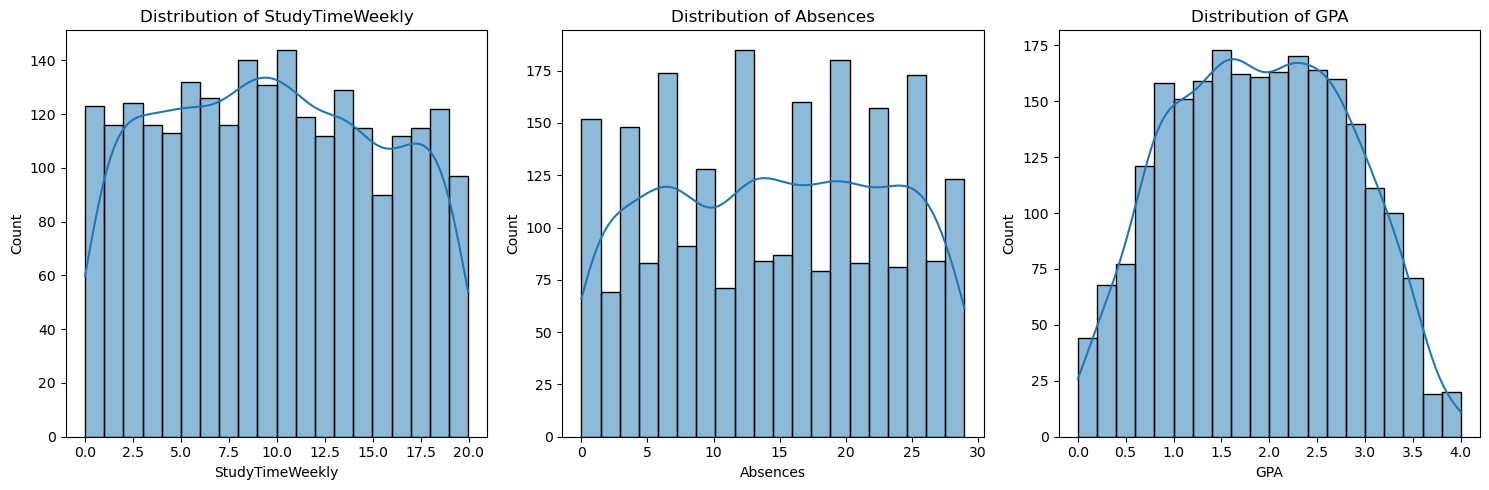

In [60]:
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 5)) 


for i, column in enumerate(numerical_columns):
    ax = axes[i] 

    sns.histplot(data=df, x=column, kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.savefig('stat2.png', dpi=300, bbox_inches='tight')

### 相关性分析

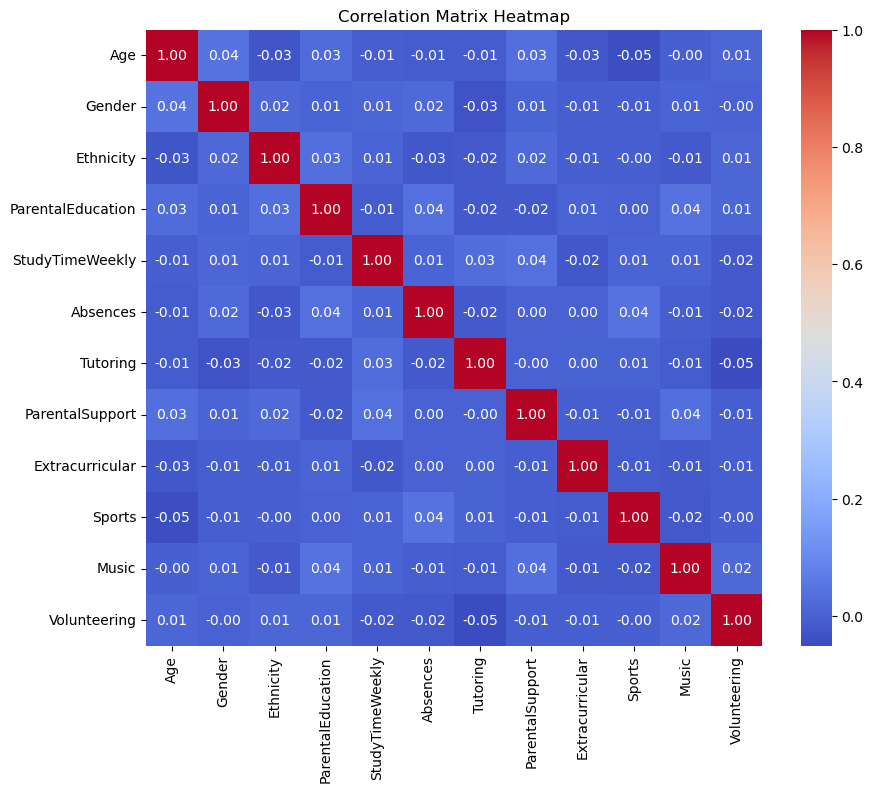

In [41]:
correlation_matrix = x.corr()  

# 热力图
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, 
            annot=True,      
            fmt=".2f",       
            cmap="coolwarm", 
            cbar=True,       
            square=True)    
plt.title("Correlation Matrix Heatmap")
plt.savefig('stat3.png', dpi=300, bbox_inches='tight')